# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete =  pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
Total_mice = study_data_complete["Mouse ID"].nunique()

Total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = study_data_complete.loc[study_data_complete.duplicated(), "Mouse ID"].unique()

duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

Duplicate_df = study_data_complete[study_data_complete.values == duplicate_mouse] 

Duplicate_df.head(13)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

test_df = study_data_complete

clean_df = test_df.drop(test_df[test_df["Mouse ID"] == "g989"].index)

clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.

Number_of_mice = clean_df["Mouse ID"].nunique()

Number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Mean_tumor_volume = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Median_tumor_volume = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Variance_tumor_volume = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
Std_dev_tumor_volume = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
Std_err_tumor_volume =clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

testsummary_df = pd.DataFrame({"Mean Tumor Volume": Mean_tumor_volume,
                               "Median Tumor Volume": Median_tumor_volume,
                               "Tumor Volume Variance": Variance_tumor_volume,
                               "Tumor Volume Std. Dev.": Std_dev_tumor_volume,
                               "Tumor Volume Std. Err.": Std_err_tumor_volume})

testsummary_df.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
Tumor_summary_df = clean_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

print(Tumor_summary_df)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Tumor_summary_df = clean_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

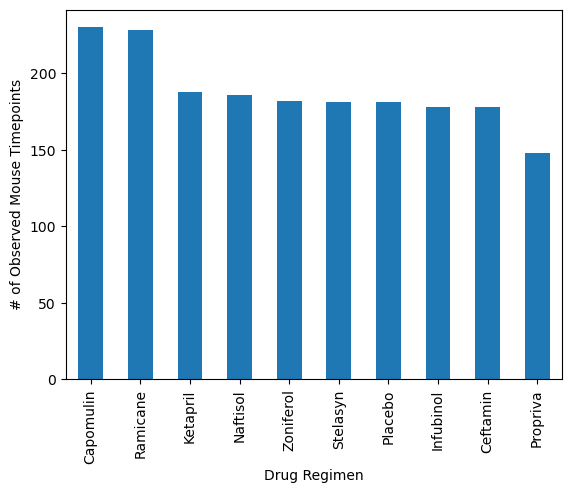

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

test_brand = clean_df["Drug Regimen"].unique()
test_count =  clean_df["Drug Regimen"].value_counts()

drug_df = pd.DataFrame({'drug_brand':['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 
         'Ceftamin', 'Propriva'],
                        'drug_count':[230, 228, 188, 186, 182, 181, 181, 178, 178, 148]})

ax= drug_df.plot.bar(x= 'drug_brand', y= 'drug_count', legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
ax


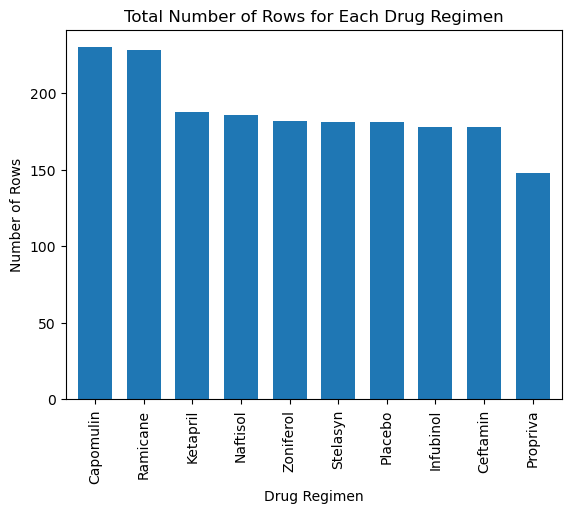

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

test_bar = clean_df['Drug Regimen'].value_counts()

test_bar.plot(kind="bar",  width = 0.7, title='Total Number of Rows for Each Drug Regimen')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()

<AxesSubplot:>

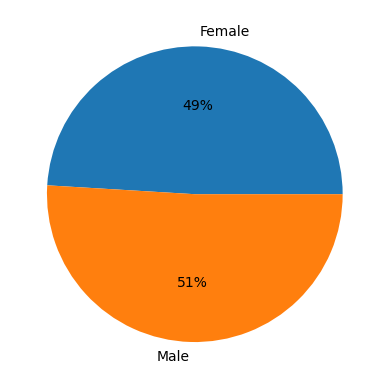

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count =  clean_df["Sex"].value_counts()
gender_count

gender_df = pd.DataFrame({'gender': ['Male', 'Female'], 'gender number': [958, 922]})

gender_df.groupby(['gender']).sum().plot(
    kind='pie', y='gender number', ylabel='', 
  autopct='%1.0f%%', legend = False)

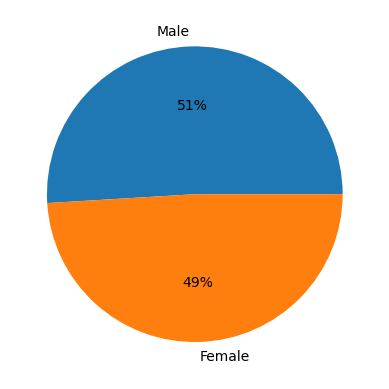

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_df['gender number'], labels = gender_df['gender'],autopct='%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtimepoint = clean_df.groupby("Mouse ID")['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(maxtimepoint, clean_df, on=['Mouse ID','Timepoint'], how = 'left')

final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data[treatment] = tumor_volumes
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    potential_outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {potential_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


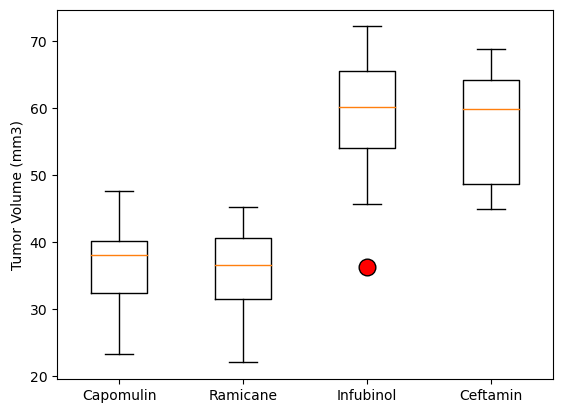

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_volume_data = [final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
                     for treatment in treatment_list]

plt.boxplot(tumor_volume_data, labels=treatment_list, flierprops = dict(marker = "o", markersize = 12, markerfacecolor = "red", ))
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

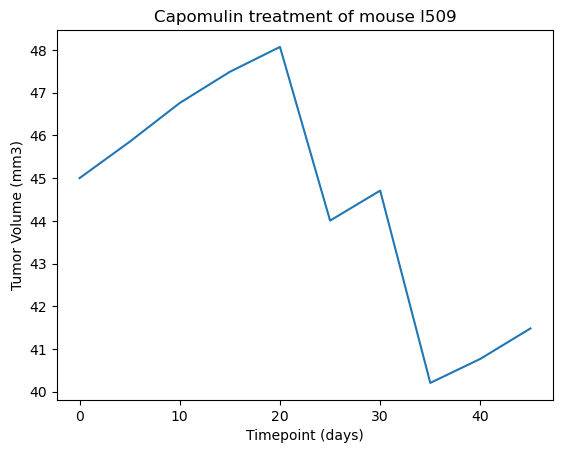

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

Test_mouse= Capomulin_df.loc[Capomulin_df['Mouse ID'] == 'l509']

plt.plot(Test_mouse['Timepoint'],Test_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

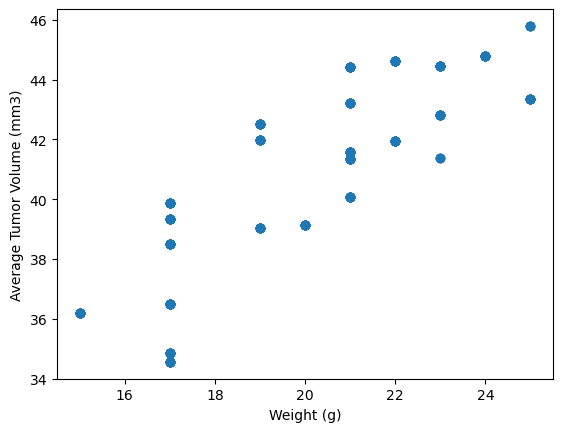

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

capomulin_tumor_volume_weight = pd.merge(average_tumor_volume, Capomulin_df[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left')


plt.scatter(capomulin_tumor_volume_weight['Weight (g)'], capomulin_tumor_volume_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


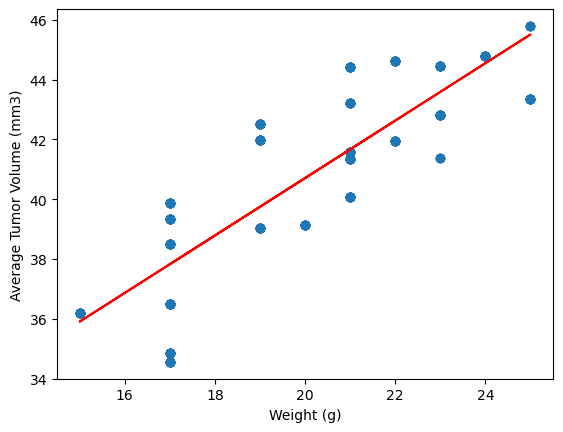

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values= capomulin_tumor_volume_weight['Weight (g)']
y_values= capomulin_tumor_volume_weight['Tumor Volume (mm3)']

slope, intercept, _, _, _ = st.linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values, slope * x_values + intercept, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.show()